In [1]:
%run functions.ipynb

np.set_printoptions(precision=3)
np.random.seed(42)

%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding

In [3]:
labels = load_file("data/labels_for_microarray_data.csv")
labels = np.array(labels, dtype=np.int32)
dataset = load_file("data/microarray_data.csv")[:, 1:].T
print(labels.shape, dataset.shape)
X_train, X_test, y_train, y_test = load_train_and_test_parts()
print("Train and test sizes: {} {}".format(X_train.shape, X_test.shape))
print(
    "(1, 0) labels count in train test: {} {}".format(
        (np.count_nonzero(y_train == 1), np.count_nonzero(y_train == 0)),
        (np.count_nonzero(y_test == 1), np.count_nonzero(y_test == 0)),
    )
)
standarizer = StandardScaler().fit(X_train)
X_std_train = standarizer.transform(X_train)
X_std_test = standarizer.transform(X_test)

(969,) (969, 12179)
Train and test sizes: (726, 12179) (243, 12179)
(1, 0) labels count in train test: (289, 437) (104, 139)


In [4]:
isomap = Isomap(n_components=240).fit(X_train)
X_isomap_train = isomap.transform(X_train)
X_isomap_test = isomap.transform(X_test)
lle = LocallyLinearEmbedding(n_components=240).fit(X_train)
X_lle_train = lle.transform(X_train)
X_lle_test = lle.transform(X_test)

Train and test scores: 0.849862258953168 0.6337448559670782


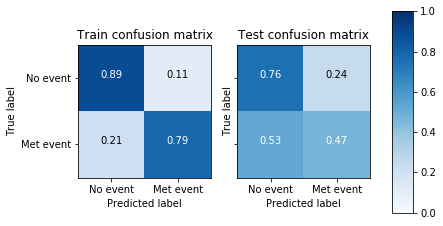

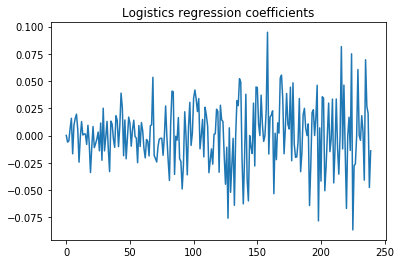

Train and test scores: 0.9696969696969697 0.7283950617283951


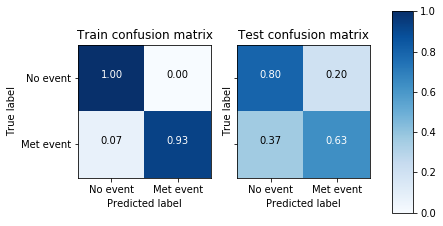

Train and test scores: 0.7575757575757576 0.6255144032921811


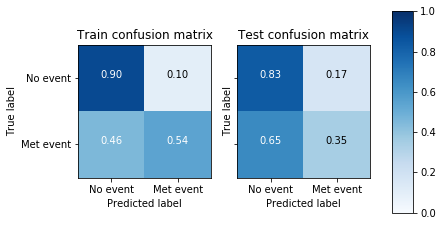

Train and test scores: 0.7589531680440771 0.6255144032921811


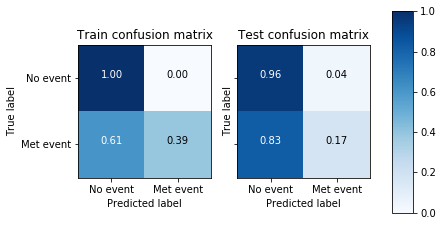

In [5]:
(clf_logit, clf_svm, clf_tree, clf_forest) = fit_models(X_isomap_train, y_train, X_isomap_test, y_test)

Train and test scores: 0.6019283746556474 0.5720164609053497


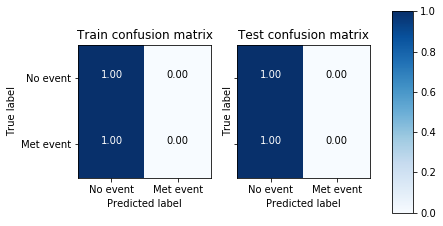

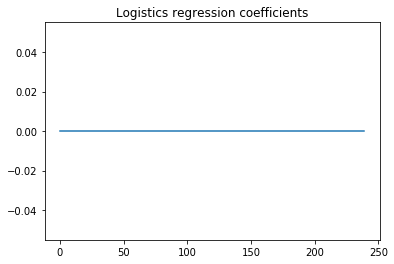

Train and test scores: 0.9972451790633609 0.7119341563786008


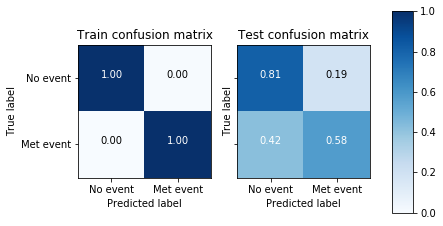

Train and test scores: 0.7713498622589532 0.6748971193415638


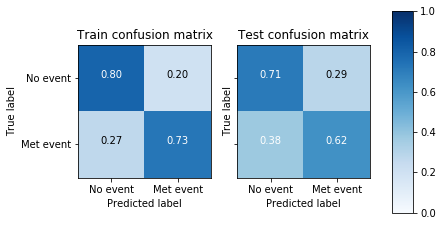

Train and test scores: 0.778236914600551 0.6748971193415638


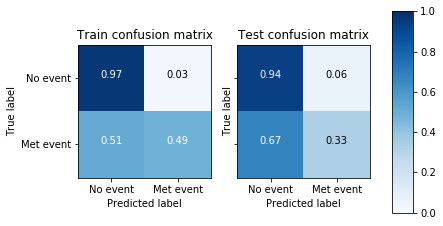

In [6]:
(clf_logit, clf_svm, clf_tree, clf_forest) = fit_models(X_lle_train, y_train, X_lle_test, y_test)